In [29]:
%load_ext autoreload
%autoreload 2

In [3]:
pip install sodapy

  Using cached https://files.pythonhosted.org/packages/11/02/5baf6e10a47018babcc43e3ed03a6f13712187f4ab1fbe263b479c77d117/sodapy-1.5.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install census

  Using cached https://files.pythonhosted.org/packages/b5/b0/670e35ba347faefa4d39d359c303baf02f99db0a9f344b4a482c817fa7b6/census-0.8.13-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [9]:
import download
import mlpipeline
import helper

In [7]:
eviction_df = download.load_evict()

In [8]:
eviction_df.head()

,filing_year,tract,eviction_filings_total,eviction_filings_rate,eviction_filings_completed,case_type_single_action,case_type_joint_action,back_rent_median,back_rent_0,back_rent_1_to_999,...,ftu_no_outcome_tenant_prose,ftu_eviction_order_tenant_represented,ftu_other_outcome_tenant_represented,ftu_no_outcome_tenant_represented,default_eviction_order_yes,default_eviction_order_no,default_eviction_order_yes_tenant_prose,default_eviction_order_no_tenant_prose,default_eviction_order_yes_tenant_represented,default_eviction_order_no_tenant_represented
0,2010-01-01,17031010100,119,5.99,116,14,102,2334.56,14,16,...,50,1,0,6,27,89,27,82,0,7
1,2010-01-01,17031010201,82,4.66,77,10,67,2559.60,10,12,...,33,0,0,6,9,68,9,62,0,6
2,2010-01-01,17031010202,58,6.45,57,3,54,1916.84,3,6,...,26,0,0,4,6,51,6,47,0,4
3,2010-01-01,17031010300,78,3.96,75,9,66,1975.61,9,5,...,33,0,0,6,9,66,8,61,1,5
4,2010-01-01,17031010400,42,2.82,41,3,38,2180.00,2,3,...,19,0,0,4,6,35,6,31,0,4


In [10]:
helper.explore_data(eviction_df)

Let's take a look at the first 10 lines of the dataframe!

  filing_year        tract  eviction_filings_total  eviction_filings_rate  \
0  2010-01-01  17031010100                     119                   5.99   
1  2010-01-01  17031010201                      82                   4.66   
2  2010-01-01  17031010202                      58                   6.45   
3  2010-01-01  17031010300                      78                   3.96   
4  2010-01-01  17031010400                      42                   2.82   
5  2010-01-01  17031010501                      59                   2.94   
6  2010-01-01  17031010502                      38                   2.57   
7  2010-01-01  17031010503                       7                   0.72   
8  2010-01-01  17031010600                      68                   3.48   
9  2010-01-01  17031010701                      35                   4.56   

   eviction_filings_completed  case_type_single_action  \
0                         116      

In [12]:
print(eviction_df['filing_year'].min())
print(eviction_df['filing_year'].max())

2010-01-01 00:00:00
2017-01-01 00:00:00


In [53]:
date_col = 'filing_year'
prediction_window = 12
start_time = '2010-01-01'
end_time = '2017-01-01'
len_train = 24
rv = mlpipeline.temporal_validation(eviction_df, date_col, prediction_window, start_time, end_time, len_train)

In [56]:
cols_to_discretize = ['back_rent_median', 'eviction_order_yes']
num_bins = 3
cats = ['low', 'medium', 'high']
cols_to_binary = []
for col in cols_to_discretize:
    cols_to_binary.append(col + "_group")
label_col = 'eviction_filings_rate'
new_label_col = 'top_eviction_rate'
k = .05
option = 1
processed_rv = mlpipeline.process_train_data(rv, cols_to_discretize, 
                                             num_bins, cats, cols_to_binary,
                                             label_col, new_label_col, k, option)

eviction_order_yes_group                         0
eviction_order_yes_tenant_represented            0
eviction_order_yes_tenant_prose                  0
eviction_order_no                                0
eviction_order_yes                               0
tenant_rep_laa                                   0
tenant_rep_pa                                    0
tenant_represented                               0
landlord_represented                             0
back_rent_5000_or_more                           0
back_rent_2500_to_4999                           0
back_rent_1000_to_2499                           0
back_rent_1_to_999                               0
back_rent_0                                      0
back_rent_median                                 0
case_type_joint_action                           0
case_type_single_action                          0
eviction_filings_completed                       0
eviction_filings_rate                            0
eviction_filings_total         

/Users/chinguyen/eviction-data-quality/scripts/mlpipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  include_lowest=True)


eviction_order_yes_group                         0
eviction_order_yes_tenant_represented            0
eviction_order_yes_tenant_prose                  0
eviction_order_no                                0
eviction_order_yes                               0
tenant_rep_laa                                   0
tenant_rep_pa                                    0
tenant_represented                               0
landlord_represented                             0
back_rent_5000_or_more                           0
back_rent_2500_to_4999                           0
back_rent_1000_to_2499                           0
back_rent_1_to_999                               0
back_rent_0                                      0
back_rent_median                                 0
case_type_joint_action                           0
case_type_single_action                          0
eviction_filings_completed                       0
eviction_filings_rate                            0
eviction_filings_total         

/Users/chinguyen/eviction-data-quality/scripts/mlpipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  include_lowest=True)


eviction_order_yes_group                         0
eviction_order_yes_tenant_represented            0
eviction_order_yes_tenant_prose                  0
eviction_order_no                                0
eviction_order_yes                               0
tenant_rep_laa                                   0
tenant_rep_pa                                    0
tenant_represented                               0
landlord_represented                             0
back_rent_5000_or_more                           0
back_rent_2500_to_4999                           0
back_rent_1000_to_2499                           0
back_rent_1_to_999                               0
back_rent_0                                      0
back_rent_median                                 0
case_type_joint_action                           0
case_type_single_action                          0
eviction_filings_completed                       0
eviction_filings_rate                            0
eviction_filings_total         

/Users/chinguyen/eviction-data-quality/scripts/mlpipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  include_lowest=True)


eviction_order_yes_group                         0
eviction_order_yes_tenant_represented            0
eviction_order_yes_tenant_prose                  0
eviction_order_no                                0
eviction_order_yes                               0
tenant_rep_laa                                   0
tenant_rep_pa                                    0
tenant_represented                               0
landlord_represented                             0
back_rent_5000_or_more                           0
back_rent_2500_to_4999                           0
back_rent_1000_to_2499                           0
back_rent_1_to_999                               0
back_rent_0                                      0
back_rent_median                                 0
case_type_joint_action                           0
case_type_single_action                          0
eviction_filings_completed                       0
eviction_filings_rate                            0
eviction_filings_total         

/Users/chinguyen/eviction-data-quality/scripts/mlpipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  include_lowest=True)


eviction_order_yes_group                         0
eviction_order_yes_tenant_represented            0
eviction_order_yes_tenant_prose                  0
eviction_order_no                                0
eviction_order_yes                               0
tenant_rep_laa                                   0
tenant_rep_pa                                    0
tenant_represented                               0
landlord_represented                             0
back_rent_5000_or_more                           0
back_rent_2500_to_4999                           0
back_rent_1000_to_2499                           0
back_rent_1_to_999                               0
back_rent_0                                      0
back_rent_median                                 0
case_type_joint_action                           0
case_type_single_action                          0
eviction_filings_completed                       0
eviction_filings_rate                            0
eviction_filings_total         

/Users/chinguyen/eviction-data-quality/scripts/mlpipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  include_lowest=True)


In [63]:
selected_features = ['back_rent_median_group_low', 'back_rent_median_group_medium',
       'back_rent_median_group_high', 'back_rent_median_group_nan',
       'eviction_order_yes_group_low', 'eviction_order_yes_group_medium',
       'eviction_order_yes_group_high', 'eviction_order_yes_group_nan']

In [64]:
len(selected_features)

8

In [68]:
grid_size = 'test'
clfs, grid = helper.define_clfs_params(grid_size)
models_to_run = ['RF', 'LR', 'DT']
predictors = selected_features
outcome = 'top_eviction_rate'
thresholds = [1, 2, 5, 10, 20, 30, 50]
time_col = 'filing_year'

RF


<Figure size 432x288 with 0 Axes>

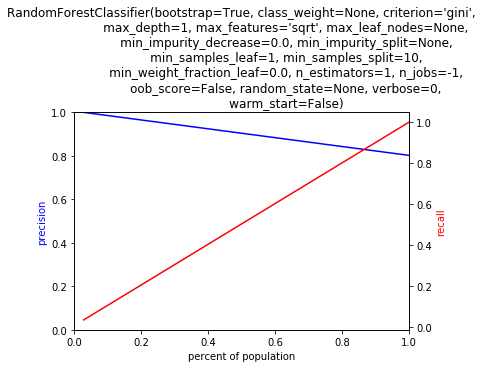

LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

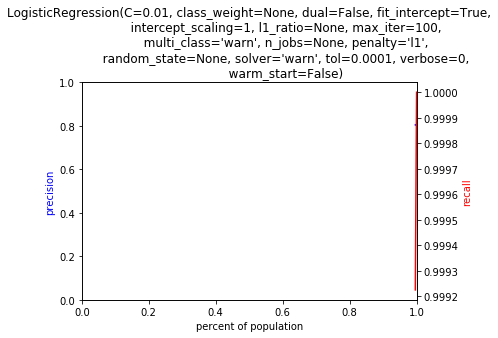

DT


<Figure size 432x288 with 0 Axes>

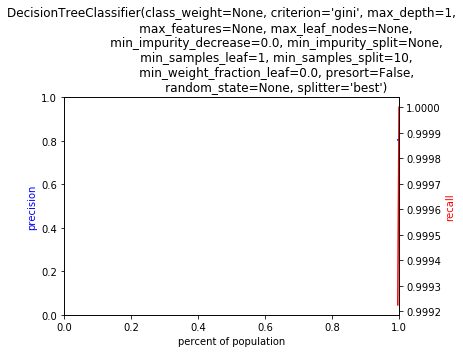

RF


<Figure size 432x288 with 0 Axes>

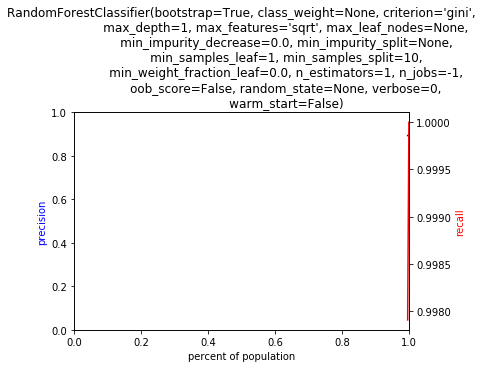

LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

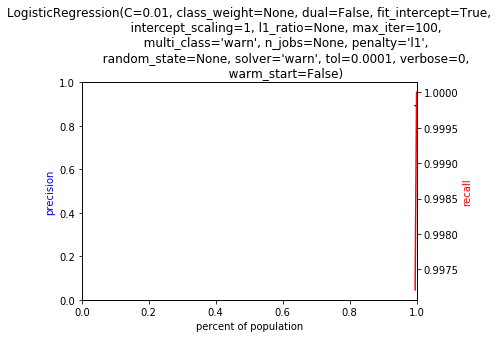

DT


<Figure size 432x288 with 0 Axes>

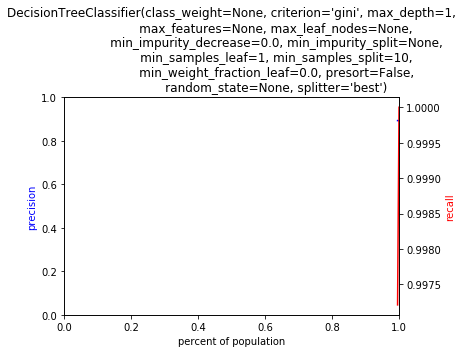

RF


<Figure size 432x288 with 0 Axes>

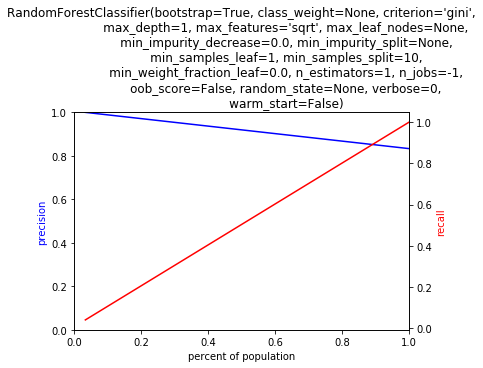

LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

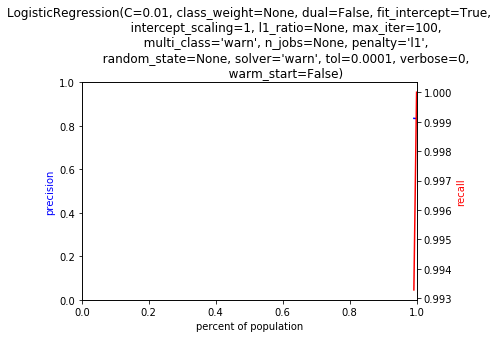

DT


<Figure size 432x288 with 0 Axes>

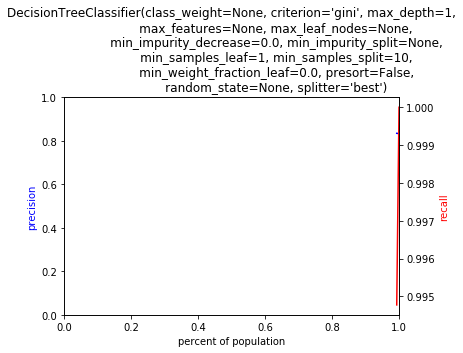

RF


<Figure size 432x288 with 0 Axes>

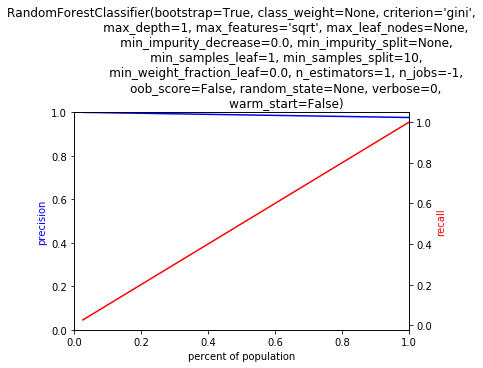

LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

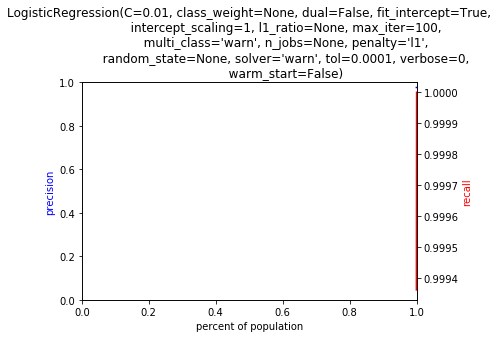

DT


<Figure size 432x288 with 0 Axes>

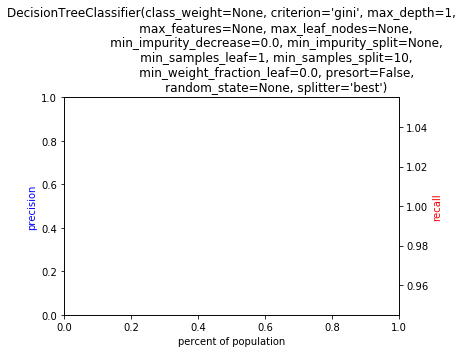

RF


<Figure size 432x288 with 0 Axes>

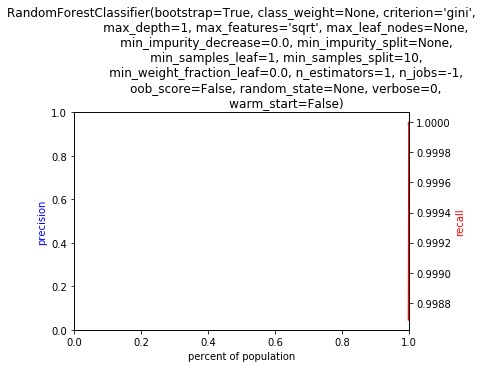

LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

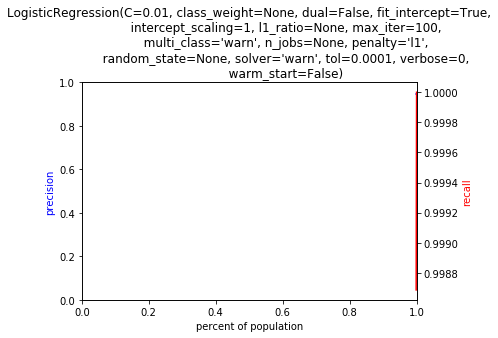

DT


<Figure size 432x288 with 0 Axes>

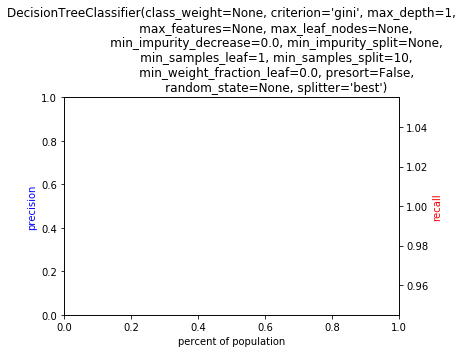

,model_type,clf,parameters,split_date,train_start,train_end,test_start,test_end,baseline,p_at_1,...,p_at_20,recall_at_20,f1_at_20,p_at_30,recall_at_30,f1_at_30,p_at_50,recall_at_50,f1_at_50,auc-roc
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2013-01-01,2010-01-01,2012-01-01,2013-01-01,2014-01-01,0.802239,1.0000,...,1.000000,0.248837,0.398510,1.000000,0.373643,0.544018,0.998756,0.622481,0.766953,0.517829
1,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2013-01-01,2010-01-01,2012-01-01,2013-01-01,2014-01-01,0.802239,1.0000,...,1.000000,0.248837,0.398510,1.000000,0.373643,0.544018,1.000000,0.623256,0.767908,0.507474
2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2013-01-01,2010-01-01,2012-01-01,2013-01-01,2014-01-01,0.802239,1.0000,...,1.000000,0.248837,0.398510,1.000000,0.373643,0.544018,1.000000,0.623256,0.767908,0.507474
3,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2014-01-01,2011-01-01,2013-01-01,2014-01-01,2015-01-01,0.891791,1.0000,...,1.000000,0.223849,0.365812,1.000000,0.336123,0.503132,1.000000,0.560669,0.718499,0.507575
4,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2014-01-01,2011-01-01,2013-01-01,2014-01-01,2015-01-01,0.891791,1.0000,...,1.000000,0.223849,0.365812,1.000000,0.336123,0.503132,1.000000,0.560669,0.718499,0.507226
5,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2014-01-01,2011-01-01,2013-01-01,2014-01-01,2015-01-01,0.891791,1.0000,...,1.000000,0.223849,0.365812,1.000000,0.336123,0.503132,1.000000,0.560669,0.718499,0.507226
6,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2015-01-01,2012-01-01,2014-01-01,2015-01-01,2016-01-01,0.833333,1.0000,...,1.000000,0.239552,0.386514,1.000000,0.359701,0.529089,0.998756,0.599254,0.749067,0.520149
7,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2015-01-01,2012-01-01,2014-01-01,2015-01-01,2016-01-01,0.833333,1.0000,...,1.000000,0.239552,0.386514,1.000000,0.359701,0.529089,1.000000,0.600000,0.750000,0.504104
8,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2015-01-01,2012-01-01,2014-01-01,2015-01-01,2016-01-01,0.833333,1.0000,...,1.000000,0.239552,0.386514,1.000000,0.359701,0.529089,1.000000,0.600000,0.750000,0.504851
9,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2016-01-01,2013-01-01,2015-01-01,2016-01-01,2017-01-01,0.976368,1.0000,...,1.000000,0.204459,0.339503,1.000000,0.307006,0.469786,0.998756,0.511465,0.676495,0.513376


In [69]:
results_df = mlpipeline.clf_loop_cross_validation(models_to_run, clfs, grid, processed_rv, 
                                                    predictors, outcome, thresholds, time_col)
results_df